> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# this allows us to have multiple outputs in one cell 
# https://volderette.de/jupyter-notebook-tip-multiple-outputs/
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.rcParams['figure.figsize'] = [8, 8]


In [2]:
# we will priint certain things only if this is True
debugging = True

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

Using the TMDb movie data                              
This data set contains information about 10,000 movies collected from The Movie Database (TMDb)          
(cleaned from original data on Kaggle - https://www.kaggle.com/tmdb/tmdb-movie-metadata ) 

### General Properties

In [3]:
print(datetime.now())

df = pd.read_csv("tmdb-movies.csv")

print(datetime.now())

2019-08-04 21:23:28.835988
2019-08-04 21:23:28.951740


In [4]:
if debugging: 
    print(datetime.now())
    
    df.head(2)
    
    print(datetime.now()) 

2019-08-04 21:23:30.677351


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


2019-08-04 21:23:30.696342


> as noted in the data description page the genres are separated by the pipe symbol |

In [5]:
if debugging:
    print(datetime.now())
    
    df.info()
    
    print(datetime.now())

2019-08-04 21:23:37.664068
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int6

In [6]:
if debugging:
    print(datetime.now())
    
    df.describe()
    
    print(datetime.now())

2019-08-04 21:23:42.586870


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


2019-08-04 21:23:42.620753


In [7]:
if debugging:
    print(datetime.now())
    
    df.dtypes
    
    print(datetime.now())

2019-08-04 21:23:45.101769


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

2019-08-04 21:23:45.104762


> The popularity field seems like it might be interesting. So I checked the kaggle page and did a web search, but diecovered its a rating of how many times the movie was viewed the past week on the site.              
So I really don't see how its useful at all and why its even included in the dataset.        
If they had a history f the popylarity so we could see how it changed week to week that might be interesting, but having one value for one week seems utterly useless.


### Data Cleaning 


In [8]:
print(datetime.now())

# create a dataframe that contains jsut the movie id and its corresponding genres

genres_df = df[["id", "genres"]]

if debugging:
    genres_df.head(5)

print(datetime.now())    

2019-08-04 21:23:53.816315


,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


2019-08-04 21:23:53.821302


In [9]:
print(datetime.now())

# now split the genres into individual columns 
genres_split_df = genres_df["genres"].str.split("|", expand=True)

if debugging: 
    genres_split_df.head()

print(datetime.now())

2019-08-04 21:23:57.348185


,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


2019-08-04 21:23:57.374065


In [10]:
print(datetime.now())

# since both the unsplit and split genre datafraames have the same indices we can join them together 
genres_df = pd.concat( [genres_df, genres_split_df], axis=1, join="inner" )

if debugging: 
    genres_df.head(3)
    
print(datetime.now())    

2019-08-04 21:24:01.211876


,id,genres,0,1,2,3,4
0,135397,Action|Adventure|Science Fiction|Thriller,Action,Adventure,Science Fiction,Thriller,None
1,76341,Action|Adventure|Science Fiction|Thriller,Action,Adventure,Science Fiction,Thriller,None
2,262500,Adventure|Science Fiction|Thriller,Adventure,Science Fiction,Thriller,None,None


2019-08-04 21:24:01.218855


In [11]:
print(datetime.now())    

# now we want to combine columns 0 through 4 into a single genre column 
# we'll use a list comprehension to create 5 dataframes 
# and then concat them into a single dataframe 

genres_df = pd.concat ( 
    [
        pd.DataFrame( 
            { "id": genres_df["id"], "genre": genres_df[i] } 
        )
        for i in range(5)
    ] 
)

if debugging: 
    genres_df.head()

print(datetime.now())        

2019-08-04 21:24:04.317106


,id,genre
0,135397,Action
1,76341,Action
2,262500,Adventure
3,140607,Action
4,168259,Action


2019-08-04 21:24:04.326082


In [12]:
print(datetime.now())    

# we saw in the split genres dataframe that there were at most 5 genres (0 through 4)
# so now that we've combined them into one column ... 
# check and see if the number of rows in the genres dataframe 
# is equal to 5 times the number of rows in the origianl dataframe 

df.shape[0] * 5 == genres_df.shape[0] 

print(datetime.now())    

2019-08-04 21:24:11.333184


True

2019-08-04 21:24:11.334181


In [13]:
print(datetime.now())  

# compare the genres in the first row of the original dataframe with the genres in the genre dataframe 
# make sure the movie id and genres match 

df.iloc[0][["id", "genres"]]

genres_df.query( "id == {}".format(df.iloc[0]["id"]) )

print(datetime.now())  

2019-08-04 21:24:13.540488


id                                           135397
genres    Action|Adventure|Science Fiction|Thriller
Name: 0, dtype: object

,id,genre
0,135397,Action
0,135397,Adventure
0,135397,Science Fiction
0,135397,Thriller
0,135397,None


2019-08-04 21:24:13.569179


In [14]:
print(datetime.now())  

# many of the movies did not have 5 genres 
# so when we split we filled those spaces with None 
# so let's keep only those that are valid values

genres_df.shape

criteria = genres_df["genre"].notna()

genres_df = genres_df[criteria]

genres_df.shape

print(datetime.now())  

2019-08-04 21:24:21.079373


(54330, 2)

(26960, 2)

2019-08-04 21:24:21.086354


In [15]:
print(datetime.now()) 

# now join the genre dataframe back to the origianl dataframe 
# we can do this since the indicies haven't changed in either dataframe 
    
df_columns = ["id", "runtime", "vote_count", "release_year", "release_date", "revenue_adj"]
joined_df = df[df_columns].join(genres_df["genre"])

if debugging: 
    joined_df.head(3)
    joined_df.dtypes
    
print(datetime.now()) 

2019-08-04 21:24:23.350972


,id,runtime,vote_count,release_year,release_date,revenue_adj,genre
0,135397,124,5562,2015,6/9/15,1.392446e+09,Action
0,135397,124,5562,2015,6/9/15,1.392446e+09,Adventure
0,135397,124,5562,2015,6/9/15,1.392446e+09,Science Fiction


id                int64
runtime           int64
vote_count        int64
release_year      int64
release_date     object
revenue_adj     float64
genre            object
dtype: object

2019-08-04 21:24:23.370892


In [16]:
print(datetime.now()) 

# add a release_month column to the dataframe
joined_df["release_month"] = pd.to_datetime(joined_df["release_date"]).dt.month

print(datetime.now()) 

2019-08-04 21:25:03.928582
2019-08-04 21:25:05.581164


In [17]:
print(datetime.now()) 

# don't need thsi anymore
joined_df.drop(columns=["release_date"], inplace=True)

print(datetime.now()) 

2019-08-04 21:25:16.989276
2019-08-04 21:25:16.995259


In [18]:
print(datetime.now()) 

joined_df.dtypes

print(datetime.now()) 

2019-08-04 21:25:21.012548


id                 int64
runtime            int64
vote_count         int64
release_year       int64
revenue_adj      float64
genre             object
release_month      int64
dtype: object

2019-08-04 21:25:21.015540


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [82]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

p1 = joined_df.groupby("genre").size()
p1
p2 = joined_df.groupby(["genre", "release_year"]).size()
p2
p3 = joined_df.groupby(["genre"])["vote_count"].sum()
p3
p4 = joined_df.groupby(["release_year"])["vote_count"].sum()
p4
p5 = joined_df.groupby(["release_year", "genre"]).size()
p5
p6 = joined_df.groupby(["genre", "release_month"]).size()
p6

genre
Action             2385
Adventure          1471
Animation           699
Comedy             3793
Crime              1355
Documentary         520
Drama              4761
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1230
TV Movie            167
Thriller           2908
War                 270
Western             165
dtype: int64

genre    release_year
Action   1960             8
         1961             7
         1962             8
         1963             4
         1964             5
         1965             9
         1966            14
         1967             7
         1968             6
         1969            10
         1970            11
         1971            11
         1972            10
         1973            15
         1974            14
         1975            10
         1976            13
         1977            14
         1978            15
         1979             8
         1980            27
         1981            17
         1982            17
         1983            21
         1984            33
         1985            28
         1986            30
         1987            29
         1988            32
         1989            38
                         ..
Western  1980             5
         1982             2
         1983             1
         1985             

genre
Action             937007
Adventure          754807
Animation          211797
Comedy             669223
Crime              377612
Documentary         18255
Drama              869022
Family             335227
Fantasy            385399
Foreign              3126
History             61380
Horror             196538
Music               50731
Mystery            191969
Romance            284313
Science Fiction    537301
TV Movie             5739
Thriller           742803
War                 73098
Western             33947
Name: vote_count, dtype: int64

release_year
1960      7288
1961      7609
1962      6766
1963      7961
1964      9877
1965      5849
1966      3998
1967      8538
1968     11715
1969      5215
1970      6599
1971     12639
1972     11477
1973     13766
1974     12789
1975     14924
1976      9928
1977     23346
1978     11122
1979     25485
1980     27995
1981     17668
1982     34638
1983     29299
1984     43840
1985     41940
1986     39611
1987     46152
1988     37771
1989     53607
1990     63639
1991     55273
1992     59470
1993     70590
1994     98993
1995    105530
1996     74845
1997    129429
1998    112188
1999    135823
2000    120879
2001    193329
2002    187021
2003    197084
2004    223379
2005    214594
2006    228835
2007    270165
2008    290418
2009    366898
2010    389684
2011    382211
2012    512907
2013    589429
2014    553141
2015    524531
Name: vote_count, dtype: int64

release_year  genre          
1960          Action               8
              Adventure            5
              Comedy               8
              Crime                2
              Drama               13
              Family               3
              Fantasy              2
              Foreign              1
              History              5
              Horror               7
              Music                1
              Romance              6
              Science Fiction      3
              Thriller             6
              War                  2
              Western              6
1961          Action               7
              Adventure            6
              Animation            1
              Comedy              10
              Crime                2
              Drama               16
              Family               5
              Fantasy              2
              Foreign              1
              History              3
        

genre      release_month
Action     1                200
           2                146
           3                191
           4                209
           5                208
           6                213
           7                200
           8                227
           9                222
           10               203
           11               159
           12               207
Adventure  1                 93
           2                 77
           3                112
           4                108
           5                120
           6                147
           7                148
           8                121
           9                120
           10               121
           11               125
           12               179
Animation  1                 53
           2                 54
           3                 53
           4                 29
           5                 34
           6                 66
               

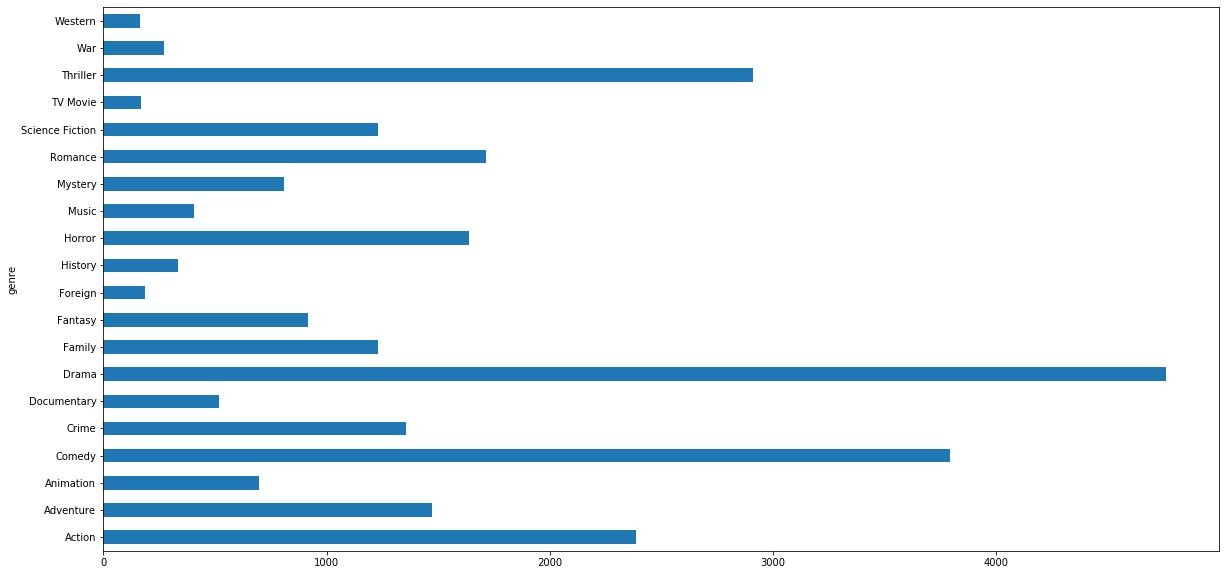

In [33]:
p1.plot(kind="barh");

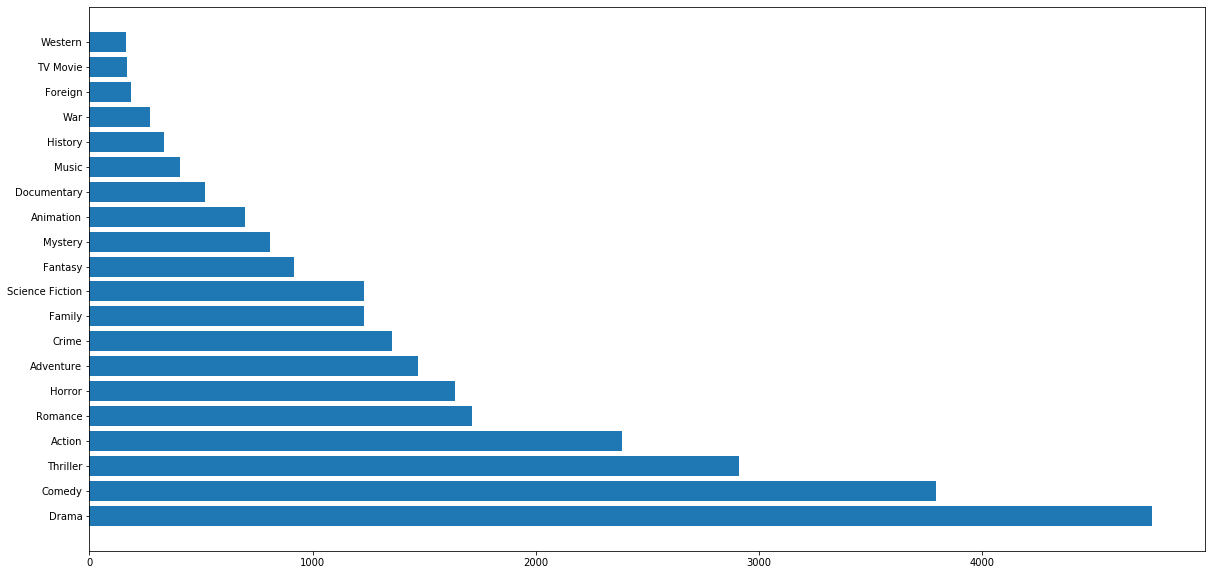

In [36]:
genre_counts = joined_df["genre"].value_counts()

plt.barh(genre_counts.index.values, genre_counts.values);

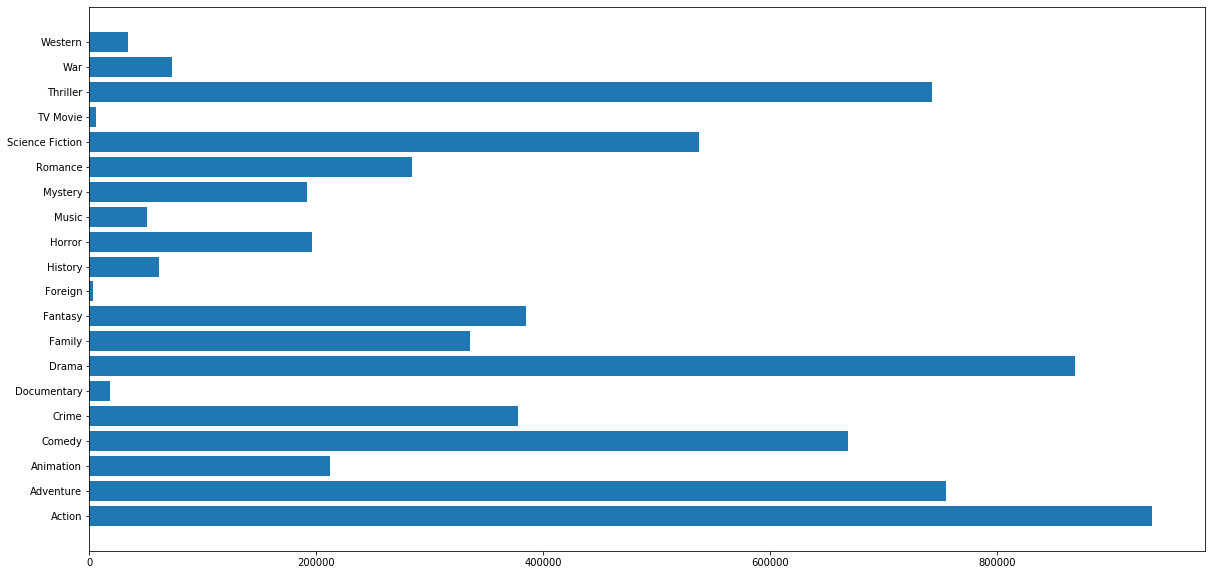

In [34]:
plt.barh(p3.index.values, p3.values);

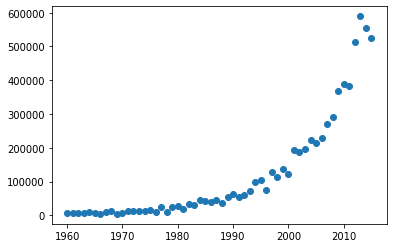

In [26]:
plt.scatter(p4.index.values, p4.values);

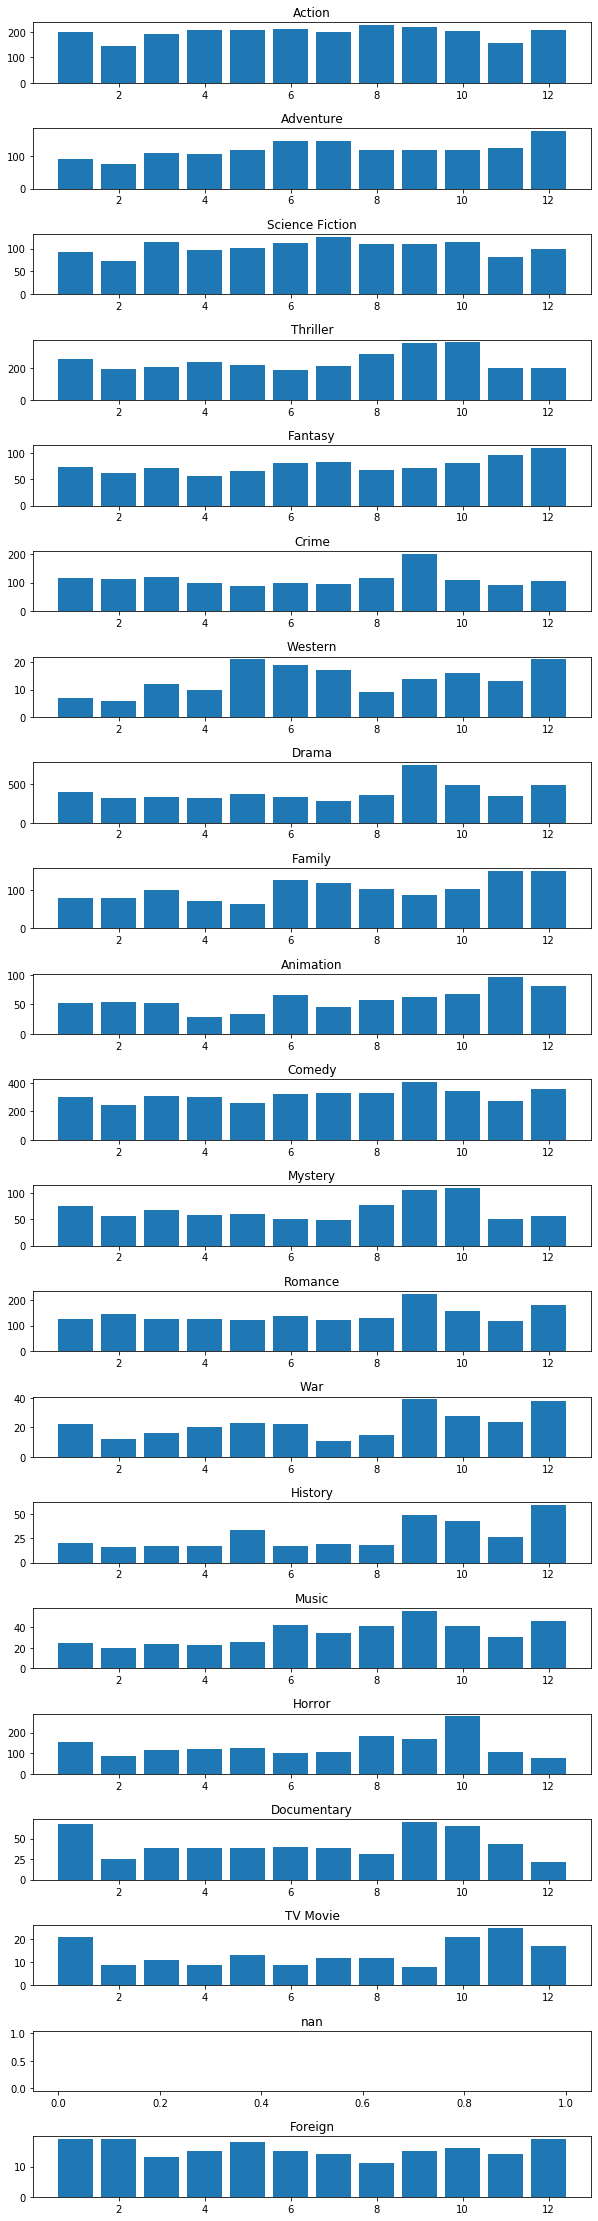

In [155]:
type(p6)
#p6.index.values
#p6.index.get_level_values(1)
#p6.index[0][0]
#p6.index[1][0]
#p6.values

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html
plt.rcParams['figure.figsize'] = [10, 40]

unique_genres = joined_df["genre"].unique()

#unique_genres

number_of = len(unique_genres)

#number_of

#fig, ax = plt.subplots(number_of, 1, sharex='col', sharey='row')

fig = plt.figure()

#fig.suptitle('This is a somewhat long figure title', fontsize=12)
#fig.xlabel('month')
#fig.ylabel('number of')
    
fig.subplots_adjust(hspace=0.75, wspace=0.1)

for v in range(0, number_of):
    #pass
    dp = joined_df[joined_df["genre"] == unique_genres[v]].groupby("release_month").size()
    #print(unique_genres[v])
    ax = fig.add_subplot(number_of, 1, v+1, label=unique_genres[v]);
    ax.bar(dp.index.values, dp.values);
    
    # https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html
    ax.set_title(unique_genres[v])
    
    #dp.index.values
    #dp.values

#ax.text(0.5, 0.5, "Month", fontsize=18, ha='center');

plt.show();    
#ax = plt.subplot()
#dp = joined_df[joined_df["release_month"] == 10].groupby("genre").size()
#ax.bar(dp.index.values, dp.values);

#fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

#fig, axes = plt.subplots(nrows=20, ncols=1)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

#fig = plt.figure()
#fig.subplots_adjust(hspace=0.8, wspace=0.8)
#p6.unstack(level=0).plot(kind='bar', subplots=True);

#fig = plt.figure();
#fig.subplots_adjust(hspace=1.0, wspace=0.2);
#for i in range(1, 13):
#    ax = fig.add_subplot(12, 1, i);
#    dp = joined_df[joined_df["release_month"] == i].groupby("genre").size()
#    # plt.barh(p3.index.values, p3.values);
#    ax.bar(dp.index.values, dp.values);
#    #ax.text(0.5, 0.5, str((6, 2, i)), fontsize=18, ha='center');
    
#plt.tight_layout();

#plt.bar(p6.index.get_level_values(0), p6.values);
#plt.bar(p6.index.get_level_values(1), p6.values);


#plt.bar(p6.index.get_level_values(1), p6.values);

#genre_counts = joined_df["genre"].value_counts()

#plt.barh(genre_counts.index.values, genre_counts.values);



### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!